In [37]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhamadluthfireynaldi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Util functions

In [4]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lowercase the tokens
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the tokens using Sasstrawi
    stemmer = StemmerFactory().create_stemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [3]:
word2vec_model = Word2Vec.load('word2vec_model_3.model')

In [4]:
similar_words = word2vec_model.wv.most_similar('cemilan', topn=10)
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

snack: 0.9921791553497314
ringan: 0.9846801161766052
an: 0.9841180443763733
kilo: 0.9760900139808655
serba: 0.9758464694023132
jajan: 0.9706935882568359
latiao: 0.9651387333869934
camil: 0.9647635221481323
gluten: 0.964328944683075
ribu: 0.9573124051094055


In [45]:
df_labeled = pd.read_csv('../../dataset/df_labeled_final.csv')

In [46]:
df_labeled

,title,label,Keterangan,price,sold,location,link,category_link
0,️ LACTOGEN PREMATUR BBLR 400 GRAM,Legal,NaN,140000,10 Terjual,KOTA BANDUNG,https://shopee.co.id/️-LACTOGEN-PREMATUR-BBLR-...,NaN
1,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | TANPA DUS ...,Legal,NaN,34999,"1,4RB Terjual",KOTA TANGERANG SELATAN,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,NaN
2,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | VANILA | 1...,Legal,NaN,52999,331 Terjual,KOTA TANGERANG SELATAN,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,NaN
3,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | TANPA DUS ...,Legal,NaN,24999,856 Terjual,KOTA TANGERANG SELATAN,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,NaN
4,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | VANILA | 3...,Legal,NaN,24999,146 Terjual,KOTA TANGERANG SELATAN,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,NaN
...,...,...,...,...,...,...,...,...
2754,Ternak Syams - Premium Susu Kambing Etawa Kolo...,Ilegal,NaN,175000,10RB+ Terjual,KOTA DEPOK,https://shopee.co.id/Ternak-Syams-Premium-Susu...,https://shopee.co.id/Susu-Olahan-cat.11043451....
2755,Totole kaldu jamur 200 gram,Legal,NaN,23000,"2,5RB Terjual",KOTA JAKARTA BARAT,https://shopee.co.id/Totole-kaldu-jamur-200-gr...,https://shopee.co.id/Makanan-Instan-cat.110434...
2756,Trieste Italian Syrup 650mL - Coffee Syrup : C...,Ilegal,NaN,70000,10RB+ Terjual,KOTA SURABAYA,https://shopee.co.id/Trieste-Italian-Syrup-650...,https://shopee.co.id/Minuman-cat.11043451.1104...
2757,Wilmond Mandarin Orange in Syrup 312gr - Buah ...,Legal,NaN,16800,633 Terjual,KOTA MALANG,https://shopee.co.id/Wilmond-Mandarin-Orange-i...,https://shopee.co.id/Makanan-Kaleng-cat.110434...


In [7]:
df_labeled['label'].value_counts()

label
Ilegal    1452
Legal     1307
Name: count, dtype: int64

In [8]:
df = df_labeled[['title', 'label', 'link']]

### Cleaning

In [9]:
preprocessed_texts = [preprocess_text(title) for title in df['title']]
df.loc[:, 'preprocessed_text'] = preprocessed_texts


KeyboardInterrupt



In [12]:
df.to_csv('../../dataset/df_labeled_cleaned_final.csv', index=False)

In [38]:
df = pd.read_csv('../../dataset/df_labeled_cleaned_final.csv')

In [39]:
df

,title,label,link,preprocessed_text
0,️ LACTOGEN PREMATUR BBLR 400 GRAM,Legal,https://shopee.co.id/️-LACTOGEN-PREMATUR-BBLR-...,lactogen prematur bblr gram
1,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | TANPA DUS ...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,cuci gudang batita gram dus madu susu formula ...
2,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | VANILA | 1...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,cuci gudang batita gram vanila susu formula tu...
3,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | TANPA DUS ...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,cuci gudang datita gram dus madu susu formula ...
4,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | VANILA | 3...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,cuci gudang datita gram vanila susu formula tu...
...,...,...,...,...
2754,Ternak Syams - Premium Susu Kambing Etawa Kolo...,Ilegal,https://shopee.co.id/Ternak-Syams-Premium-Susu...,ternak syams premium susu kambing etawa kolost...
2755,Totole kaldu jamur 200 gram,Legal,https://shopee.co.id/Totole-kaldu-jamur-200-gr...,totole kaldu jamur gram
2756,Trieste Italian Syrup 650mL - Coffee Syrup : C...,Ilegal,https://shopee.co.id/Trieste-Italian-Syrup-650...,trieste italian syrup ml coffee syrup caramel ...
2757,Wilmond Mandarin Orange in Syrup 312gr - Buah ...,Legal,https://shopee.co.id/Wilmond-Mandarin-Orange-i...,wilmond mandarin orange in syrup gr buah jeruk...


In [41]:
# Define the regular expression pattern
pattern = ['gram', 'ml', 'kg', 'cuci', 'gudang', 'gr', 'isi', 'pcs', 'ternak', 'dus', 'premium']

# Use regular expressions to remove special characters from the 'text' column
df['preprocessed_text_ed'] = df['preprocessed_text'].replace(pattern, '', regex=True)

In [44]:
df[['title', 'preprocessed_text_ed', 'preprocessed_text']]

,title,preprocessed_text_ed,preprocessed_text
0,️ LACTOGEN PREMATUR BBLR 400 GRAM,lactogen prematur bblr,lactogen prematur bblr gram
1,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | TANPA DUS ...,batita madu susu formula tumbuh anak bubuk,cuci gudang batita gram dus madu susu formula ...
2,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | VANILA | 1...,batita vanila susu formula tumbuh anak bubu...,cuci gudang batita gram vanila susu formula tu...
3,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | TANPA DUS ...,datita madu susu formula tumbuh anak bubuk,cuci gudang datita gram dus madu susu formula ...
4,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | VANILA | 3...,datita vanila susu formula tumbuh anak bubu...,cuci gudang datita gram vanila susu formula tu...
...,...,...,...
2754,Ternak Syams - Premium Susu Kambing Etawa Kolo...,syams susu kambing etawa kolostrum colostrum...,ternak syams premium susu kambing etawa kolost...
2755,Totole kaldu jamur 200 gram,totole kaldu jamur,totole kaldu jamur gram
2756,Trieste Italian Syrup 650mL - Coffee Syrup : C...,trieste italian syrup coffee syrup caramel va...,trieste italian syrup ml coffee syrup caramel ...
2757,Wilmond Mandarin Orange in Syrup 312gr - Buah ...,wilmond mandarin orange in syrup buah jeruk m...,wilmond mandarin orange in syrup gr buah jeruk...


SyntaxError: invalid syntax (1114732642.py, line 1)

### Tokenize & Pad Sequence

In [13]:
df = df.dropna(subset=['preprocessed_text'])

In [14]:
df['preprocessed_text'].isna().sum()

0

In [15]:
# Tokenize and Pad Sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['preprocessed_text'])

sequences = tokenizer.texts_to_sequences(df['preprocessed_text'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

### Generate word embeddings

In [17]:
# Generate Word Embeddings
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        # If the word is present in the Word2Vec model's vocabulary,
        # assign its corresponding word vector to the embedding matrix
        embedding_matrix[i] = word2vec_model.wv[word]
    else:
        # Handle out-of-vocabulary words
        # For example, you can initialize their embeddings randomly or with zeros
        # Option 1: Random Initialization
        embedding_matrix[i] = np.random.randn(word2vec_model.vector_size)

        # Option 2: Zero Initialization
        # embedding_matrix[i] = np.zeros(word2vec_model.vector_size)

        # Option 3: Fallback to Average/Zero Vector
        # embedding_matrix[i] = word2vec_model.wv.vectors.mean(axis=0)  # Assuming word2vec_model.wv.vectors is a numpy array containing all word vectors
        # Or
        # embedding_matrix[i] = np.zeros(word2vec_model.vector_size)
        pass

In [18]:
len(embedding_matrix)

3201

In [19]:
# df.loc[:, 'label'] = df['label'].replace({'Legal': 0, 'Ilegal': 1})

In [20]:
df['label'].value_counts()

label
Ilegal    1452
Legal     1306
Name: count, dtype: int64

In [21]:
label_mapping = {'Legal': 0, 'Ilegal': 1}
df['label'] = df['label'].map(label_mapping)

/var/folders/1k/rvddzkqj4yn9vwymqmntyzv00000gn/T/ipykernel_1745/267217348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map(label_mapping)


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)


## Word2Vec & LSTM

In [34]:
# Define and compile your model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
# model.add(LSTM(64, return_sequences=True))  # First LSTM layer with return_sequences=True
model.add(LSTM(32))  # Second LSTM layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
56/56 [==============================] - 1s 9ms/step - loss: 0.5926 - accuracy: 0.6842 - val_loss: 0.5410 - val_accuracy: 0.7308
Epoch 2/10
56/56 [==============================] - 0s 6ms/step - loss: 0.5501 - accuracy: 0.7296 - val_loss: 0.5323 - val_accuracy: 0.7330
Epoch 3/10
56/56 [==============================] - 0s 6ms/step - loss: 0.5364 - accuracy: 0.7381 - val_loss: 0.5219 - val_accuracy: 0.7421
Epoch 4/10
56/56 [==============================] - 0s 6ms/step - loss: 0.5271 - accuracy: 0.7381 - val_loss: 0.5190 - val_accuracy: 0.7466
Epoch 5/10
56/56 [==============================] - 0s 6ms/step - loss: 0.5129 - accuracy: 0.7460 - val_loss: 0.5171 - val_accuracy: 0.7285
Epoch 6/10
56/56 [==============================] - 0s 6ms/step - loss: 0.5105 - accuracy: 0.7432 - val_loss: 0.5096 - val_accuracy: 0.7443
Epoch 7/10
56/56 [==============================] - 0s 6ms/step - loss: 0.5092 - accuracy: 0.7455 - val_loss: 0.5039 - val_accuracy: 0.7398
Epoch 8/10
56/56 [==

In [35]:
# Generate predictions
y_pred = model.predict(X_test)
# y_pred = (y_pred_prob > 0.5).astype(int)

18/18 [==============================] - 0s 2ms/step


## ROC Curves

69/69 [==============================] - 0s 2ms/step


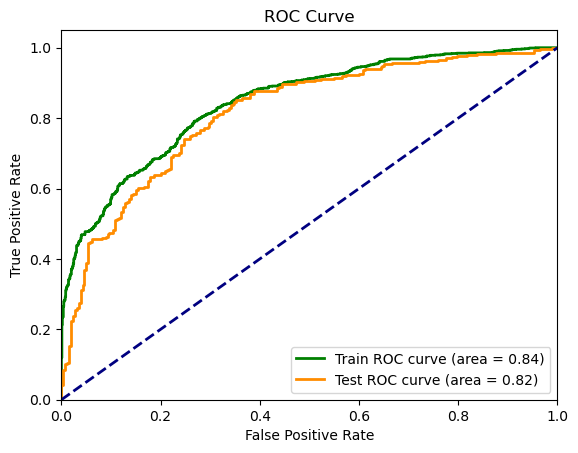

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions for training data
y_train_pred = model.predict(X_train)
# y_train_pred = (y_train_pred_prob > 0.5).astype(int)  # Thresholding at 0.5 to get binary predictions

# Compute ROC curve and AUC for training predictions
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test predictions
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves for both training and test predictions
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## PRC Curves

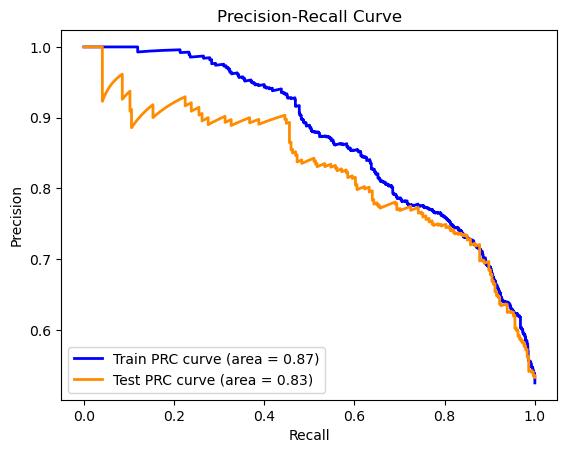

In [37]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Generate precision and recall values for training data
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)
auc_train = auc(recall_train, precision_train)

# Generate precision and recall values for test data
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred)
auc_test = auc(recall_test, precision_test)

# Plot Precision-Recall curves for both training and test data
plt.figure()
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Train PRC curve (area = %0.2f)' % auc_train)
plt.plot(recall_test, precision_test, color='darkorange', lw=2, label='Test PRC curve (area = %0.2f)' % auc_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [38]:
# Save the model
model.save('rey_model_v2.keras')

In [71]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred, target_names=['Legal', 'Ilegal']))

## TFIDF & LSTM

In [72]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# Step 1: Preprocessing the Data
# Assuming X_train_text, y_train, X_test_text, y_test are your training and testing data

# Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Convert TF-IDF matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Step 3: Build the LSTM Model
vocab_size = len(tfidf_vectorizer.vocabulary_)
embedding_dim = 100
lstm_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Training the Model
model.fit(X_train_dense, y_train, epochs=10, batch_size=64, validation_data=(X_test_dense, y_test))

# Step 5: Evaluation
loss, accuracy = model.evaluate(X_test_dense, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/10
35/35 [==============================] - 89s 3s/step - loss: 0.6930 - accuracy: 0.5231 - val_loss: 0.6917 - val_accuracy: 0.5326
Epoch 2/10
35/35 [==============================] - 85s 2s/step - loss: 0.6918 - accuracy: 0.5249 - val_loss: 0.6915 - val_accuracy: 0.5326
Epoch 3/10
35/35 [==============================] - 87s 2s/step - loss: 0.6925 - accuracy: 0.5249 - val_loss: 0.6914 - val_accuracy: 0.5326
Epoch 4/10
35/35 [==============================] - 87s 2s/step - loss: 0.6924 - accuracy: 0.5249 - val_loss: 0.6915 - val_accuracy: 0.5326
Epoch 5/10
35/35 [==============================] - 87s 2s/step - loss: 0.6920 - accuracy: 0.5249 - val_loss: 0.6910 - val_accuracy: 0.5326
Epoch 6/10
35/35 [==============================] - 87s 2s/step - loss: 0.6921 - accuracy: 0.5249 - val_loss: 0.6913 - val_accuracy: 0.5326
Epoch 7/10
35/35 [==============================] - 87s 2s/step - loss: 0.6924 - accuracy: 0.5249 - val_loss: 0.6914 - val_accuracy: 0.5326
Epoch 8/10
35/35 [==

## Word2Vec & Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [44]:
# Function to average word vectors for a document
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

# Vectorize the text data using averaged word vectors
X_train_word2vec = np.array([average_word_vectors(words, word2vec_model, word2vec_model.wv.key_to_index, word2vec_model.vector_size) for words in X_train])
X_test_word2vec = np.array([average_word_vectors(words, word2vec_model, word2vec_model.wv.key_to_index, word2vec_model.vector_size) for words in X_test])

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_word2vec, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_word2vec)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.532608695652174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.53      1.00      0.70       294

    accuracy                           0.53       552
   macro avg       0.27      0.50      0.35       552
weighted avg       0.28      0.53      0.37       552



/Users/muhamadluthfireynaldi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muhamadluthfireynaldi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muhamadluthfireynaldi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [47]:
X_train

array([[   0,    0,    0, ..., 1542,  124,   72],
       [   0,    0,    0, ...,   83, 1887, 1888],
       [   0,    0,    0, ...,    8,   10,    6],
       ...,
       [   0,    0,    0, ...,  130,    9,    2],
       [   0,    0,    0, ...,   34,   74,    1],
       [   0,    0,    0, ...,   17,    8,   10]], dtype=int32)

In [48]:
df

,title,label,link,preprocessed_text
0,️ LACTOGEN PREMATUR BBLR 400 GRAM,0,https://shopee.co.id/️-LACTOGEN-PREMATUR-BBLR-...,lactogen prematur bblr gram
1,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | TANPA DUS ...,0,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,cuci gudang batita gram dus madu susu formula ...
2,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | VANILA | 1...,0,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,cuci gudang batita gram vanila susu formula tu...
3,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | TANPA DUS ...,0,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,cuci gudang datita gram dus madu susu formula ...
4,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | VANILA | 3...,0,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,cuci gudang datita gram vanila susu formula tu...
...,...,...,...,...
2754,Ternak Syams - Premium Susu Kambing Etawa Kolo...,1,https://shopee.co.id/Ternak-Syams-Premium-Susu...,ternak syams premium susu kambing etawa kolost...
2755,Totole kaldu jamur 200 gram,0,https://shopee.co.id/Totole-kaldu-jamur-200-gr...,totole kaldu jamur gram
2756,Trieste Italian Syrup 650mL - Coffee Syrup : C...,1,https://shopee.co.id/Trieste-Italian-Syrup-650...,trieste italian syrup ml coffee syrup caramel ...
2757,Wilmond Mandarin Orange in Syrup 312gr - Buah ...,0,https://shopee.co.id/Wilmond-Mandarin-Orange-i...,wilmond mandarin orange in syrup gr buah jeruk...


In [13]:
X_train

2650                             kremes hati ayam premium
261                                              arak bal
1610    nutribaby royal premature susu formula bayi pr...
1407           milo cube malaysia isi pcs import malaysia
1789             peptisol susu pangan perlu medis gr stok
                              ...                        
1638    nutriflakes seral umbi garut formulasi herbal ...
1095    jameson irish whisky ml original resmi by vinyard
1130       johnnie walker red label blended scotch whisky
1294    lactogen premature lbw g susu formula berat la...
860                        enfamil a premature gram kemas
Name: preprocessed_text, Length: 2207, dtype: object

## TFIDF & Naive Bayes

In [19]:
df

,title,label,link,preprocessed_text
0,️ LACTOGEN PREMATUR BBLR 400 GRAM,Legal,https://shopee.co.id/️-LACTOGEN-PREMATUR-BBLR-...,lactogen prematur bblr gram
1,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | TANPA DUS ...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,cuci gudang batita gram dus madu susu formula ...
2,‼️CUCI GUDANG‼️ BATITA 1+ 900GRAM | VANILA | 1...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-BATITA-1-...,cuci gudang batita gram vanila susu formula tu...
3,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | TANPA DUS ...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,cuci gudang datita gram dus madu susu formula ...
4,‼️CUCI GUDANG‼️ DATITA 3+ 900GRAM | VANILA | 3...,Legal,https://shopee.co.id/‼️CUCI-GUDANG‼️-DATITA-3-...,cuci gudang datita gram vanila susu formula tu...
...,...,...,...,...
2754,Ternak Syams - Premium Susu Kambing Etawa Kolo...,Ilegal,https://shopee.co.id/Ternak-Syams-Premium-Susu...,ternak syams premium susu kambing etawa kolost...
2755,Totole kaldu jamur 200 gram,Legal,https://shopee.co.id/Totole-kaldu-jamur-200-gr...,totole kaldu jamur gram
2756,Trieste Italian Syrup 650mL - Coffee Syrup : C...,Ilegal,https://shopee.co.id/Trieste-Italian-Syrup-650...,trieste italian syrup ml coffee syrup caramel ...
2757,Wilmond Mandarin Orange in Syrup 312gr - Buah ...,Legal,https://shopee.co.id/Wilmond-Mandarin-Orange-i...,wilmond mandarin orange in syrup gr buah jeruk...


In [18]:
df['preprocessed_text'] = df['preprocessed_text'].fillna('')

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)


In [36]:
joblib.dump(vectorizer, "vectorizer.joblib")

['vectorizer.joblib']

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Vectorize the text data using TF-IDF representation
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8242753623188406
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       268
           1       0.81      0.86      0.83       284

    accuracy                           0.82       552
   macro avg       0.83      0.82      0.82       552
weighted avg       0.83      0.82      0.82       552



In [23]:
import joblib

In [33]:
joblib.dump(nb_classifier, "nb_classifier.joblib")

['nb_classifier.joblib']

In [28]:
label_mapping = {'Legal': 0, 'Ilegal': 1}
df['label'] = df['label'].map(label_mapping)

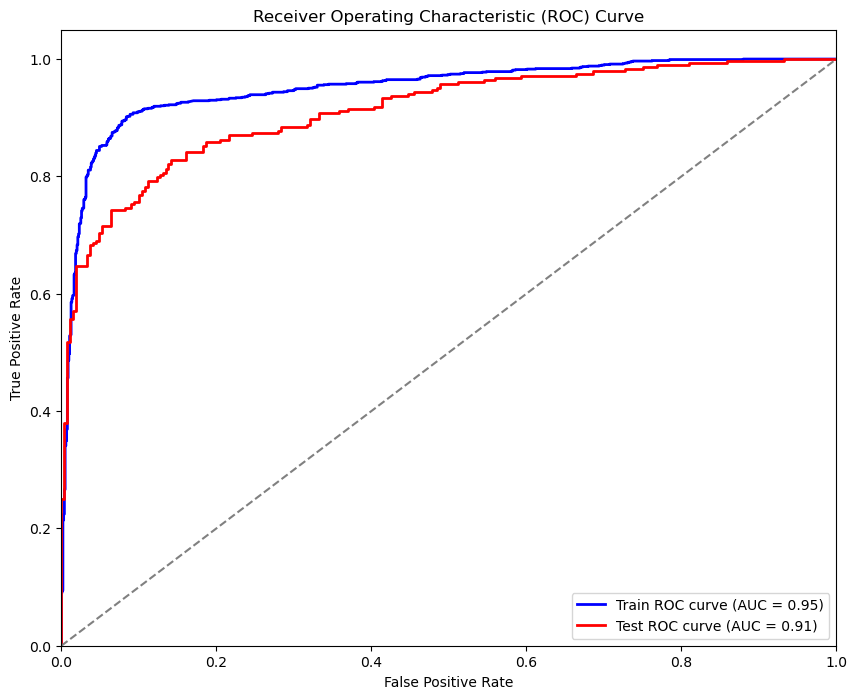

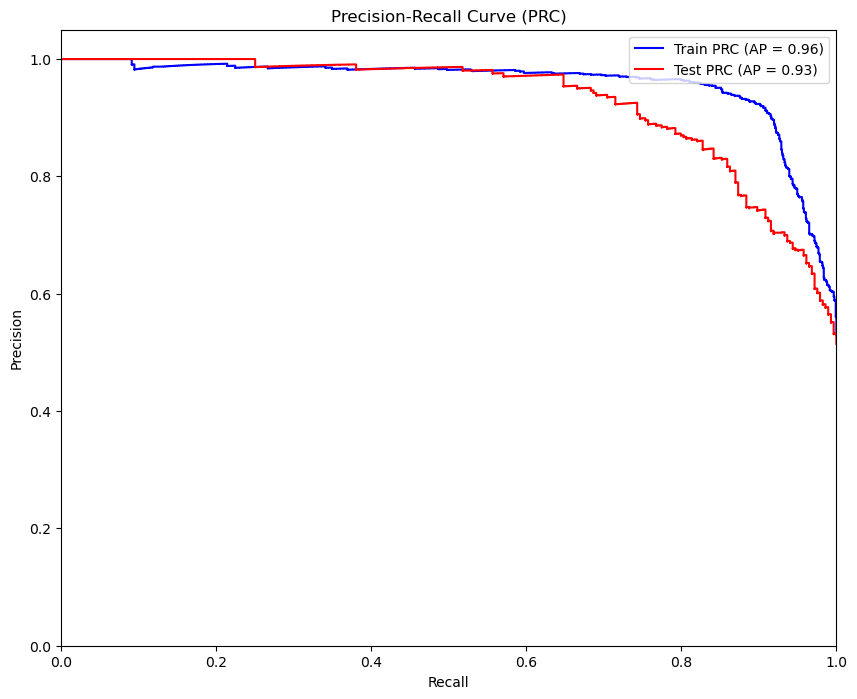

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Train set predictions
y_train_pred_proba = nb_classifier.predict_proba(X_train_vectorized)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
average_precision_train = average_precision_score(y_train, y_train_pred_proba)

# Test set predictions
y_test_pred_proba = nb_classifier.predict_proba(X_test_vectorized)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
average_precision_test = average_precision_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.step(recall_train, precision_train, color='blue', where='post', label='Train PRC (AP = %0.2f)' % average_precision_train)
plt.step(recall_test, precision_test, color='red', where='post', label='Test PRC (AP = %0.2f)' % average_precision_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc="upper right")
plt.show()

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

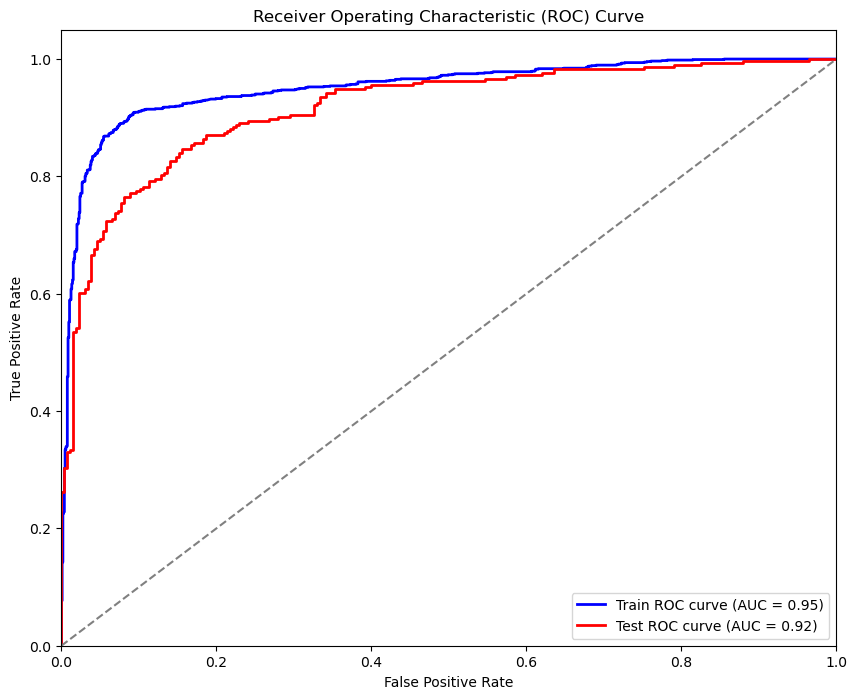

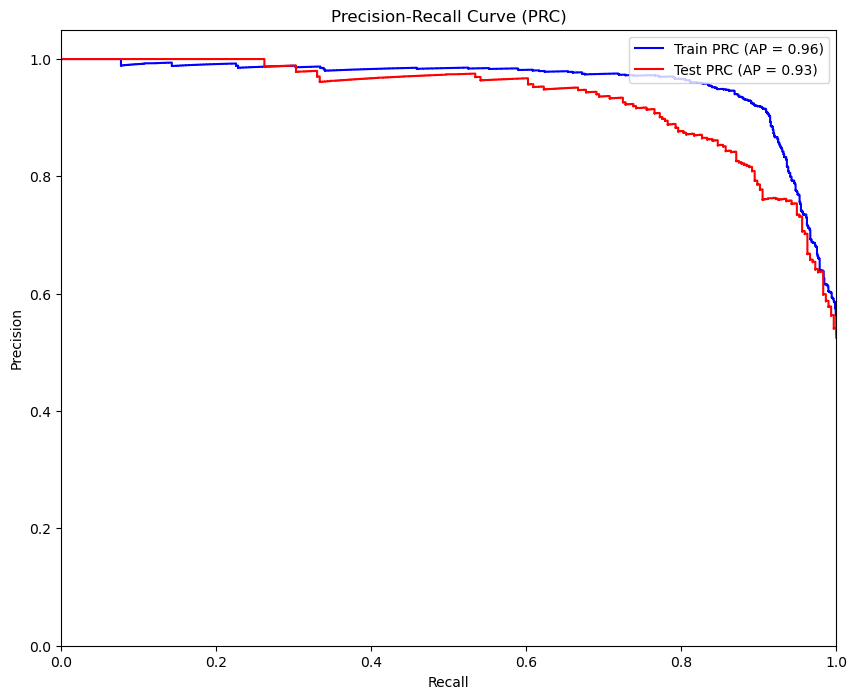

In [58]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Train set predictions
y_train_pred_proba = nb_classifier.predict_proba(X_train_vectorized)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
average_precision_train = average_precision_score(y_train, y_train_pred_proba)

# Test set predictions
y_test_pred_proba = nb_classifier.predict_proba(X_test_vectorized)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
average_precision_test = average_precision_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.step(recall_train, precision_train, color='blue', where='post', label='Train PRC (AP = %0.2f)' % average_precision_train)
plt.step(recall_test, precision_test, color='red', where='post', label='Test PRC (AP = %0.2f)' % average_precision_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc="upper right")
plt.show()